# CS221, Spring 2019, PS2 Sentiment
Haiyuan Mei (hmei0411@stanford.edu)

## 1.a
* The gradient of hinge loss w.r.t. $\mathbf{w}$ is 
  $$
    \nabla_\mathbf{w} \text{Loss}_{\text{hinge}}(x, y, \mathbf{w}) = \begin{cases}
    \phi(x) y,  \mathbf{w} \cdot \phi(x) y \le 1 \\
    0, \text{otherwise} \\
    \end{cases}
  $$
  
*  Represent the 4 samples with vectors in the order of ("pretty", "good", "bad", "plot", "not", "scenery"), and their margin scores/margins starting from $\mathbf{w}=\vec{0}$: 

  1. ($-1$) pretty bad:  
    $x^{(1)}=[1,0,1,0,0,0]$, $y^{(1)}=-1$, $\mathbf{w}=[0,0,0,0,0,0]$, score=0, margin=0   
    $\nabla_\mathbf{w} \text{Loss}_{\text{hinge}}(x, y, \mathbf{w})=\phi(x) y=[-1,0,-1,0,0,0]$  
    $\mathbf{w} = \mathbf{w} - 0.5 \times [-1,0,-1,0,0,0] = [0.5,0,0.5,0,0,0]$  
    
  2. ($+1$) good plot:  
    $x^{(2)}=[0,1,0,1,0,0]$, $y^{(2)}=+1$, $\mathbf{w}=[0.5,0,0.5,0,0,0]$, score=0, margin=0    
    $\nabla_\mathbf{w} \text{Loss}_{\text{hinge}}(x, y, \mathbf{w})=\phi(x) y=[0,1,0,1,0,0]$  
    $\mathbf{w} = \mathbf{w} - 0.5 \times [0,1,0,1,0,0] = [0.5,0,0.5,0,0,0] - [0,0.5,0,0.5,0,0]=[0.5,-0.5,0.5,-0.5,0,0]$  
    
  3. ($-1$) not good:  
    $x^{(3)}=[0,1,0,0,1,0]$, $y^{(3)}=-1$, $\mathbf{w}=[0.5,-0.5,0.5,-0.5,0,0]$, score=-0.5, margin=0.5     
    $\nabla_\mathbf{w} \text{Loss}_{\text{hinge}}(x, y, \mathbf{w})=\phi(x) y=[0,-1,0,0,-1,0]$  
    $\mathbf{w} = \mathbf{w} - 0.5 \times [0,-1,0,0,-1,0] = [0.5,-0.5,0.5,-0.5,0,0] - [0,-0.5,0,0,-0.5,0]=[0.5,0,0.5,-0.5,0.5,0]$  
    
  4. ($+1$) pretty scenery:  
    $x^{(4)}=[1,0,0,0,0,1]$, $y^{(4)}=+1$, $\mathbf{w}=[0.5,0,0.5,-0.5,0.5,0]$, score=0.5, margin=0.5    
    $\nabla_\mathbf{w} \text{Loss}_{\text{hinge}}(x, y, \mathbf{w})=\phi(x) y=[1,0,0,0,0,1]$  
    $\mathbf{w} = \mathbf{w} - 0.5 \times [0,-1,0,0,-1,0] = [0.5,0,0.5,-0.5,0.5,0] - [0.5,0,0,0,0,0.5]=[0,0,0.5,-0.5,0.5,-0.5]$ 

* Conclusion: after the 4 samples trained, the weights for each of the six words are: $[0,0,0.5,-0.5,0.5,-0.5]$
    

## 1.b
Prove that no linear classifier can gain 0 error.
* The 4 new datasets are:
  1. ($-1$) not good:  
    $x^{(1)}=[0,1,0,0,1,0]$, $y^{(1)}=-1$
    
  2. ($+1$) good:  
    $x^{(1)}=[0,1,0,0,0,0]$, $y^{(1)}=+1$
    
  3. ($+1$) not bad:  
    $x^{(1)}=[0,0,1,0,1,0]$, $y^{(1)}=+1$
    
  4. ($-1$) bad:  
    $x^{(1)}=[0,0,1,0,0,0]$, $y^{(1)}=-1$
    
 If there exists a $\mathbf{w}$ such that it makes no error, then the following should be true:
 $$
 \begin{cases}
 w_1 + w_4 < 0 \\
 w_1 > 0 \\
 w_2 + w_4 > 0 \\
 w_2 < 0
 \end{cases}
 $$
 This is impossible, because: if $w_1 > 0$, we must have $w_4<0$; since $w_2 < 0$, then $w_2 + w_4 > 0$ is impossible.
 
* Add an additional feature that could fix the problem, we could add a feature indication whether it is a single word which can make the above inequalities to have possible solution.

## 2.a
The Loss expression can be written as:
$$\begin{eqnarray*}
\text{Loss}(x, y, \mathbf w) &=& (y - \sigma(z))^2 \\
 &=& (y - \sigma(\mathbf w \cdot \phi(x)))^2\\
 &=& \left ( y - \frac{1}{1+e^{-\mathbf w \cdot \phi(x)}}\right ) ^2
\end{eqnarray*}$$

## 2.b
By applying the chain rule of gradient, the gradient w.r.t. $\mathbf w$:  
$$
\nabla_\mathbf{w} \text{Loss}(x, y, \mathbf w) = -2 (y - \sigma(z))\sigma(z)(1-\sigma(z))\phi(x) 
$$
$\text{where } z = \mathbf w \cdot \phi(x)$

## 2.C
From section b, replace y by 1, think of $||\phi(x)||$ as some constant and consider the following function:
$$
f(\sigma) = 2 (\sigma-1)^2\sigma, \text{where } \sigma \in (0,1)
$$
The function looks like following: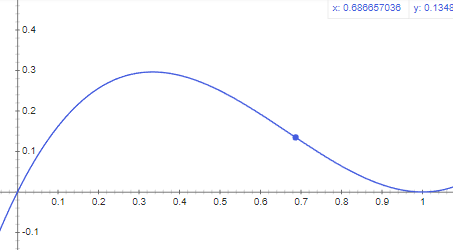

This function touches 0 twice when $\sigma=0$ or $\sigma=1$, but $\sigma$ can never reach 0 or 1, so f(\sigma) can not reach a  minimum, it is lower bounded by 0, and it can never be 0.

## 2.d 
When $\sigma \in (0,1)$, it can reach maximun when it's gradient is 0:
$$\begin{eqnarray*}
f'(\sigma) &=& -4 (\sigma-1)\sigma - 2(\sigma-1)^2 \\
&=& -6\sigma^2 + 8\sigma - 2 = 0 \\
&\Rightarrow& \sigma = \frac{1}{3}, \text{ when } \sigma \in (0,1)
\end{eqnarray*}$$  
Which means if we choose a $\mathbf w$ which makes $\sigma(\mathbf w \cdot \phi(x)) = \frac{1}{3}$, we can reach a maximum gradient magnitude.   
The max magnitude is $f(1/3) = \frac{8}{27} \lVert \phi(x) \lVert$

## 3.e
